In [1]:
import math as m
import numpy as np
import matplotlib.pyplot as plt

$$
\ddot \theta + \omega ^2 \sin \theta = A \cos \omega_1 t
$$

$$
\dot \theta  = v_{\theta} \\
\dot v_{\theta} = - \omega ^2 \sin \theta + A \cos \omega_1 t
$$

$$
\mathbb{J}^* = 
\left ( \begin{matrix}
0 & 1 & 0\\
-\omega^2 \cos\theta & 0 & -\omega _1 A \sin \omega_1 t
\end{matrix}
\right)
$$

In [49]:
def pendulo_simple(x , t , args=[0,0]):
    # x = (theta, v_theta)
    # args = Amplitud , omega_1
    return np.array([ x[1] , -np.sin(x[0]) + args[0]*np.cos(args[1]*t)])

def J_pendulo_simple(x , t , args=[0,0]):
    # J = [(0, 1) , (-w2 cos(th) , 0)]
    # args = Amplitud , omega_1
    return np.array([[0, 1,0] , [-np.cos(x[0]) , 0,-args[0]*args[1]*np.sin(args[1]*t)]])

def EDO_Jac(g,Jac,x0,t,args=None):
    #para un sistema NO autonomo
    h , sol = t[1]-t[0] , np.zeros( (len(x0),len(t)) )
    sol[:,0] = x0 #condicion inicial
    for i in range(len(t)-1):
        sol[:,i+1] = sol[:,i] + h*g(sol[:,i],t[i],args) 
        sol[:,i+1] += 0.5*(h**2)*np.dot( Jac(sol[:,i],t[i],args), np.concatenate((g(sol[:,i],t[i],args),[1])) )
    return sol

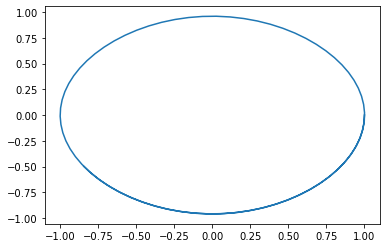

In [60]:
t = np.linspace(0,3*np.pi,100)
sol = EDO_Jac(pendulo_simple,J_pendulo_simple,[1,0],t,args=[0,0])
plt.plot(sol[0,:],sol[1,:])
plt.show()

In [54]:
a=pendulo_simple([1,1,1],1)
b=J_pendulo_simple([1,1,1],1)
a,b , np.concatenate( (a,[1]) )

(array([ 1.        , -0.84147098]),
 array([[ 0.        ,  1.        ,  0.        ],
        [-0.54030231,  0.        ,  0.        ]]),
 array([ 1.        , -0.84147098,  1.        ]))

In [55]:
np.dot(b,np.concatenate((a,[1])))

array([-0.84147098, -0.54030231])